## PREDICTION USING SUPERVISED MACHINE LEARNING

In [1]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#filter out warning
import warnings
warnings.filterwarnings('ignore')

#importing the required libraries
import pandas as pd
import numpy as np
import os
from scipy import stats 
from  scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from  sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

## READING THE DATASET FOR FURTHER ANALYSIS

In [3]:
#loading the csv data into a data frame
weather_data=pd.read_csv(r"C:\Users\HARSHDEEP SINGH\Downloads\weatherHistory.csv")
display(weather_data)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


## EXPLORATORY DATA ANALYSIS

In [4]:
#Extracting first five rows and columns from datset 
weather_data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [5]:
#checking data dimension
weather_data.shape

(96453, 12)

In [6]:
#viewing the columns of the data
weather_data.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [7]:
#checking the column information
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [8]:
#checking the structure of the data
weather_data.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [9]:
#checking for missing values if any
weather_data.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

## TREATING MISSING VALUES

As we can see missing values are present only for 'Precip Type' which constitutes less than 5% of the total number of records so we are going to treat it with the category having the highest frequency

Text(0, 0.5, 'COUNT')

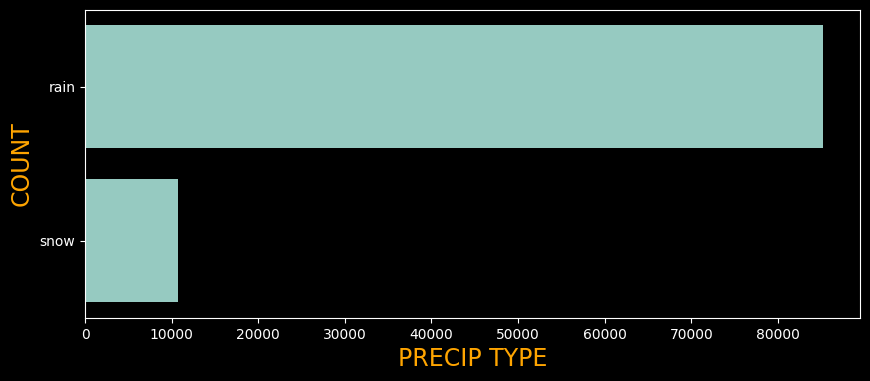

In [10]:
#plotting the column 'Precip Type'
plt.style.use('dark_background')
plt.subplots(figsize=(10,4))
sns.countplot(weather_data['Precip Type'])
plt.xlabel('PRECIP TYPE',fontdict={'color':'orange','fontsize':17})
plt.ylabel('COUNT',fontdict={'color':'orange','fontsize':17})

In [11]:
#so filling the missing values with rain
weather_data['Precip Type']=weather_data['Precip Type'].fillna('rain')

#making sure that all the missing values are imputed
weather_data.isnull().sum().any()

np.False_

In [12]:
#summary of all the continuous variables
weather_data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


Uncertain about the meaning or importance of the variable "Loud Cover", and the data being all zeros, we will drop it

In [13]:
#drop 'Loud Cover'
weather_data=weather_data.drop(['Loud Cover'],axis=1)

In [14]:
#showing correlation between the variables
df=weather_data.iloc[:,[3,4,5,6,7,8,9]]
corr_data=df.corr()
display(corr_data)

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,0.005454
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,-0.049263
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,-0.011651
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,0.059818
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,1.000000


<Axes: >

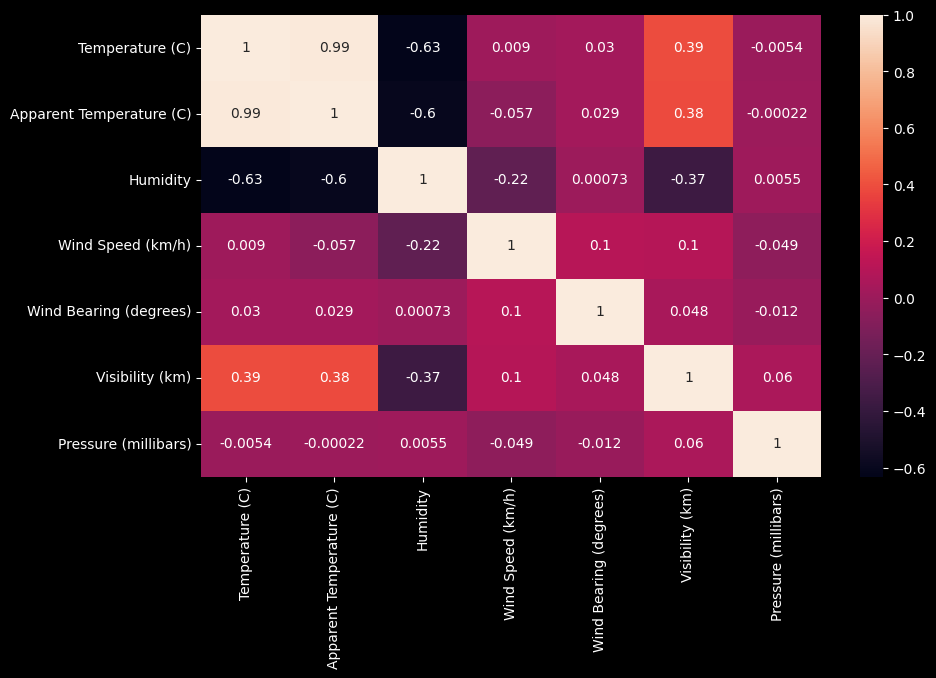

In [15]:
#plotting the correlation matrix using heatmap
plt.subplots(figsize=(10,6))
sns.heatmap(corr_data,annot=True)

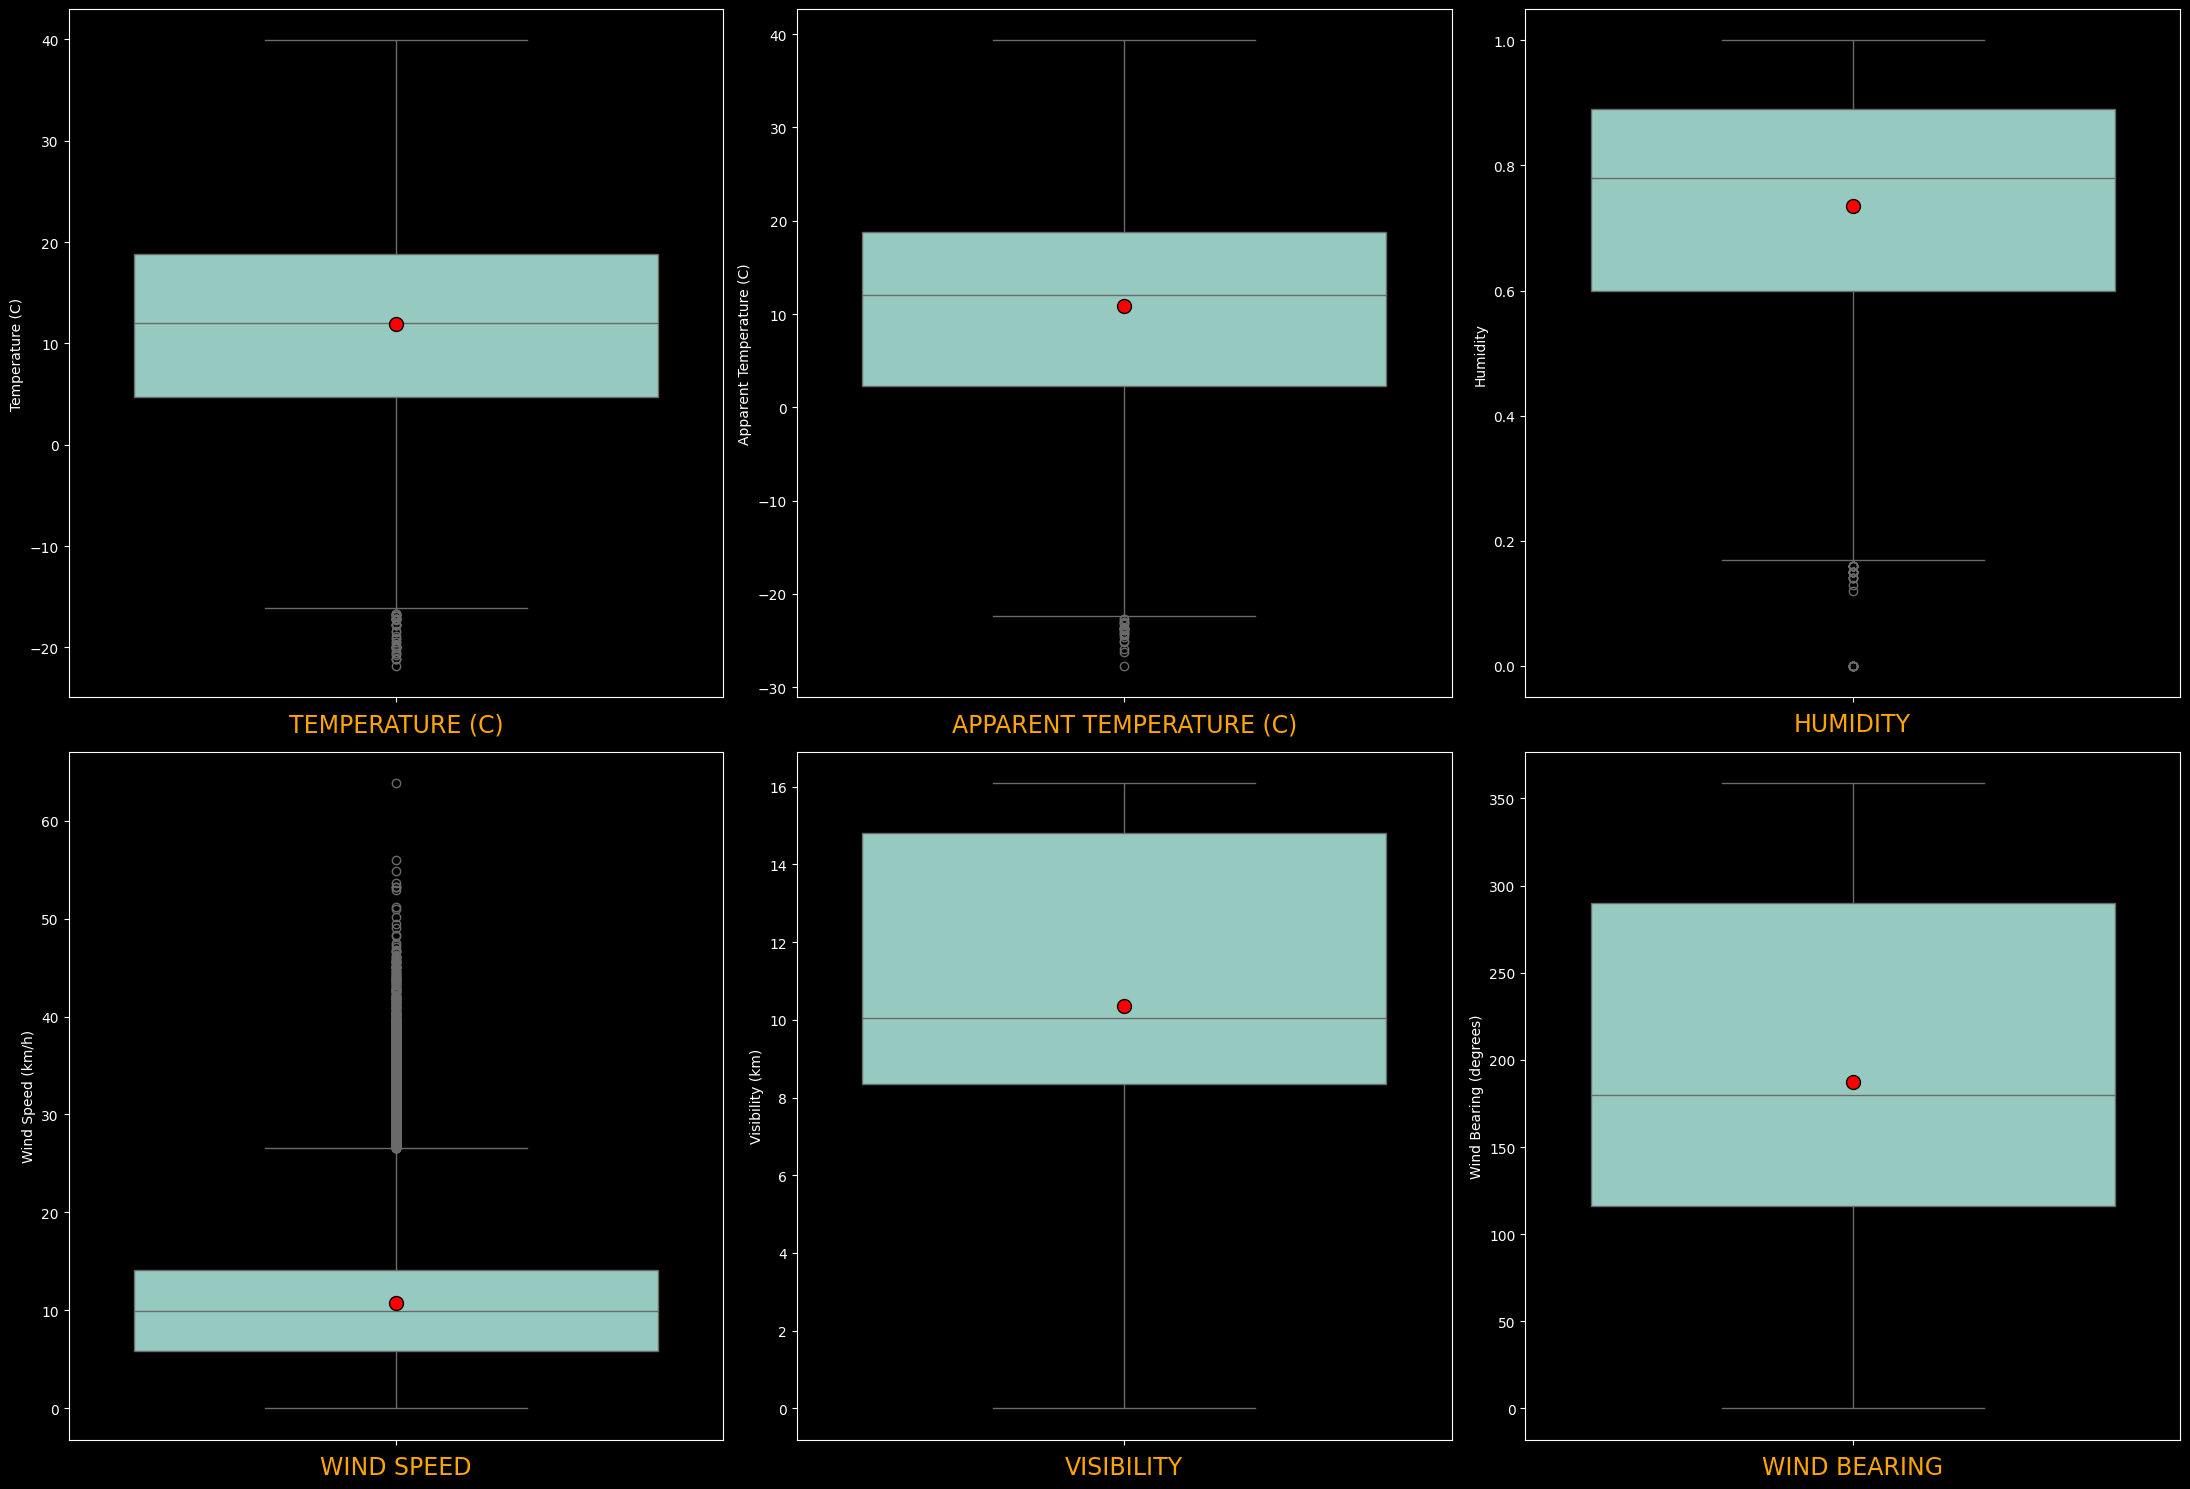

In [16]:
#plotting graphs for continuous variables to check the data distribution
plt.style.use('dark_background')
plt.figure(figsize=(22,15))
plt.subplot(2,3,1)
sns.boxplot(weather_data['Temperature (C)'],showmeans=True,meanprops={'marker':'o','markerfacecolor':'red','markeredgecolor':'black','markersize':10})
plt.xlabel('TEMPERATURE (C)',fontdict={'color':'orange','fontsize':17})

plt.subplot(2,3,2)
sns.boxplot(weather_data['Apparent Temperature (C)'],showmeans=True,meanprops={'marker':'o','markerfacecolor':'red','markeredgecolor':'black','markersize':10})
plt.xlabel('APPARENT TEMPERATURE (C)',fontdict={'color':'orange','fontsize':17})

plt.subplot(2,3,3)
sns.boxplot(weather_data['Humidity'],showmeans=True,meanprops={'marker':'o','markerfacecolor':'red','markeredgecolor':'black','markersize':10})
plt.xlabel('HUMIDITY',fontdict={'color':'orange','fontsize':17})

plt.subplot(2,3,4)
sns.boxplot(weather_data['Wind Speed (km/h)'],showmeans=True,meanprops={'marker':'o','markerfacecolor':'red','markeredgecolor':'black','markersize':10})
plt.xlabel('WIND SPEED',fontdict={'color':'orange','fontsize':17})

plt.subplot(2,3,5)
sns.boxplot(weather_data['Visibility (km)'],showmeans=True,meanprops={'marker':'o','markerfacecolor':'red','markeredgecolor':'black','markersize':10})
plt.xlabel('VISIBILITY',fontdict={'color':'orange','fontsize':17})

plt.subplot(2,3,6)
sns.boxplot(weather_data['Wind Bearing (degrees)'],showmeans=True,meanprops={'marker':'o','markerfacecolor':'red','markeredgecolor':'black','markersize':10})
plt.xlabel('WIND BEARING',fontdict={'color':'orange','fontsize':17})


#improving the spacing between subplots
plt.tight_layout()

There is a large difference between Mean and Median or Second Quartile (50% value) for variable "Humidity". So, it can be said that outiers are present.

In [17]:
#treating outliers using z-score
outliers=[]
def detect_outlier(data):
    
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers
outlier_data = detect_outlier(weather_data["Humidity"])
print (outlier_data)

[0.14, 0.14, 0.14, 0.13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12, 0.14]


In [18]:
print(weather_data['Humidity'].quantile(0.10))
print(weather_data['Humidity'].quantile(0.90))

0.43
0.95


In [19]:
weather_data['Humidity']=np.where(weather_data['Humidity']<0.43,0.43,weather_data['Humidity']) #Flooring
weather_data['Humidity']=np.where(weather_data['Humidity']>0.95,0.95,weather_data['Humidity']) #Capping

Text(0.5, 0, 'HUMIDITY')

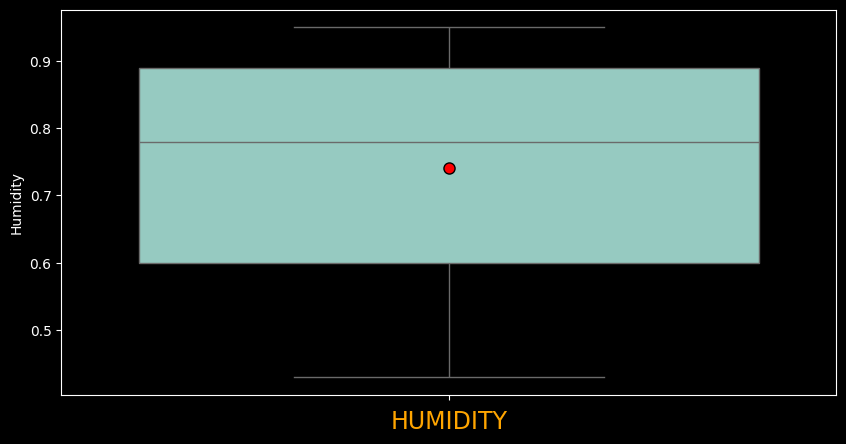

In [20]:
#plotting boxplot after removing outliers from "Humidity"
plt.style.use('dark_background')
plt.subplots(figsize=(10,5))
sns.boxplot(weather_data['Humidity'],showmeans=True,meanprops={'marker':'o','markerfacecolor':'red','markeredgecolor':'black','markersize':8})
plt.xlabel('HUMIDITY',fontdict={'color':'orange','fontsize':17})

## DATA VISUALIZATION

## Categorical Unordered Univariate Analysis

Text(0, 0.5, 'SUMMARY')

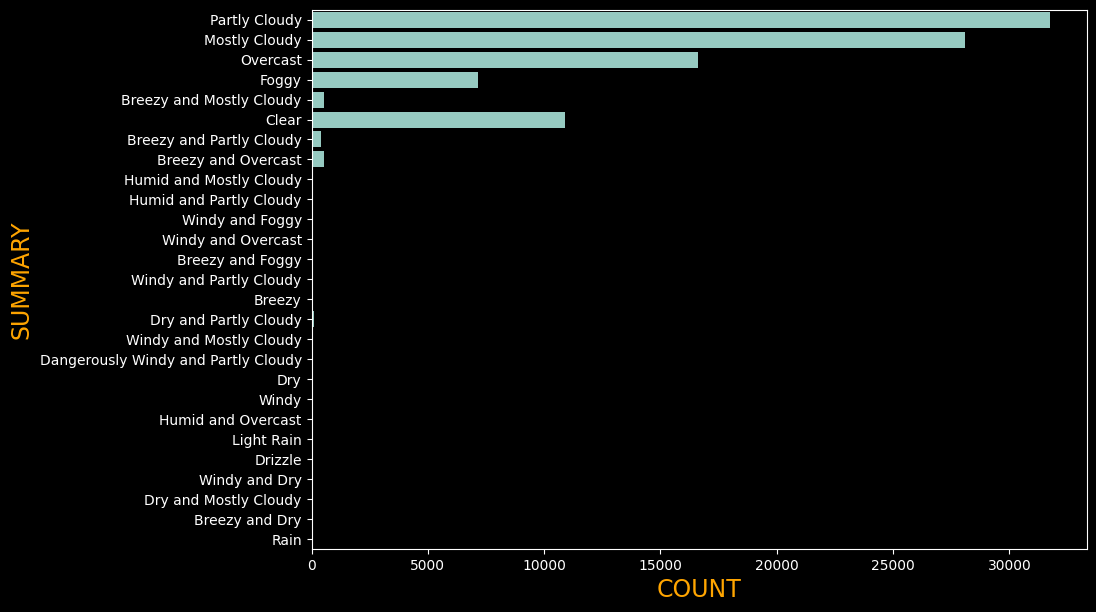

In [21]:
plt.style.use('dark_background')
plt.subplots(figsize=(10,7))
sns.countplot(y=weather_data['Summary'])
plt.xlabel('COUNT',fontdict={'color':'orange','fontsize':17})
plt.ylabel('SUMMARY',fontdict={'color':'orange','fontsize':17})

Under the categorical field 'Summary', "Partly Cloudy" appeared for the most number of times.

Text(0, 0.5, 'PRECIP TYPE')

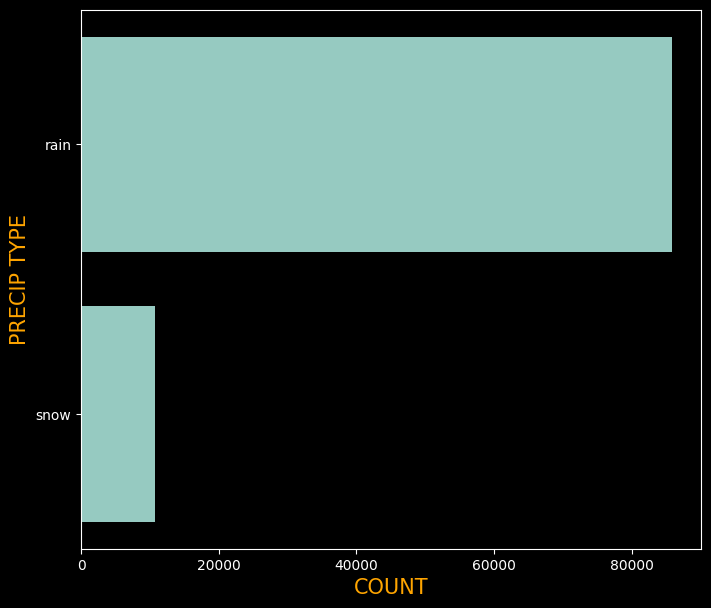

In [22]:
plt.style.use('dark_background')
plt.subplots(figsize=(8,7))
sns.countplot(y=weather_data['Precip Type'])
plt.xlabel('COUNT',fontdict={'color':'orange','fontsize':15})
plt.ylabel('PRECIP TYPE',fontdict={'color':'orange','fontsize':15})

Between the two precip types,"rain" has the highest count.

## BIVARIATE ANALYSIS

## Numeric Analysis

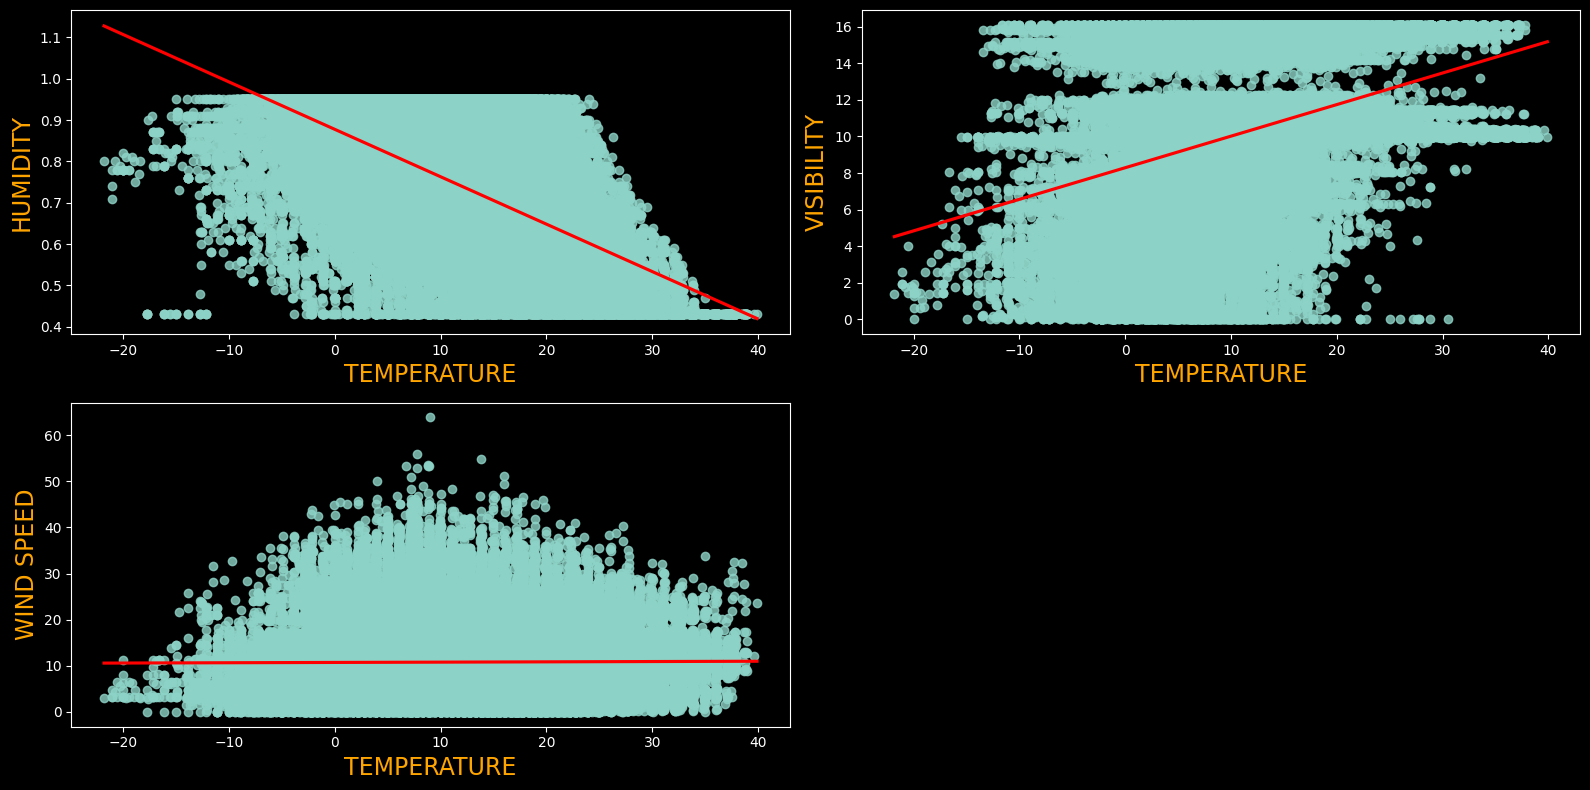

In [23]:
plt.style.use('dark_background')
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.regplot(x=weather_data['Temperature (C)'],y=weather_data['Humidity'],line_kws={'color':'red'})
plt.xlabel('TEMPERATURE',fontdict={'color':'orange','fontsize':17})
plt.ylabel('HUMIDITY',fontdict={'color':'orange','fontsize':17})

plt.subplot(2,2,2)
sns.regplot(x=weather_data['Temperature (C)'],y=weather_data['Visibility (km)'],line_kws={'color':'red'})
plt.xlabel('TEMPERATURE',fontdict={'color':'orange','fontsize':17})
plt.ylabel('VISIBILITY',fontdict={'color':'orange','fontsize':17})

plt.subplot(2,2,3)
sns.regplot(x=weather_data['Temperature (C)'],y=weather_data['Wind Speed (km/h)'],line_kws={'color':'red'})
plt.xlabel('TEMPERATURE',fontdict={'color':'orange','fontsize':17})
plt.ylabel('WIND SPEED',fontdict={'color':'orange','fontsize':17})

plt.tight_layout()

In the first subplot there is a negative relationship between temperature and humidity because as we know when temperature decreases,air become wet and thus humidity increases.

In the second subplot we see that visibility increases with the increase in temprature that is there is a positive relationship bewteen temperature and visibility, due to the summer having clearer skies and less fog.

In the third subplot wind speed is less in the summer relative to winter.

We will drop 'Summary' and 'Daily Summary' since it has many levels.

In [24]:
weather_data=weather_data.drop(['Summary','Daily Summary'],axis=1)

In [25]:
weather_data.shape

(96453, 9)

In [26]:
display(weather_data)

,Formatted Date,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,2006-04-01 00:00:00.000 +0200,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,2006-04-01 01:00:00.000 +0200,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,2006-04-01 02:00:00.000 +0200,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,2006-04-01 03:00:00.000 +0200,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,2006-04-01 04:00:00.000 +0200,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,2016-09-09 20:00:00.000 +0200,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,2016-09-09 21:00:00.000 +0200,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,2016-09-09 22:00:00.000 +0200,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95


## PREPARING THE DATA FOR MODELLING

In [27]:
#creating the dependent and independent datasets
dep_data=weather_data.iloc[:,2]
ind_data=weather_data.iloc[:,[3,4,5,6,7,8]]

In [28]:
#converting dep_data into a data frame
dep_data=pd.DataFrame(dep_data)
display(dep_data)

,Temperature (C)
0,9.472222
1,9.355556
2,9.377778
3,8.288889
4,8.755556
...,...
96448,26.016667
96449,24.583333
96450,22.038889
96451,21.522222


Text(0.5, 0, 'TEMPERATURE')

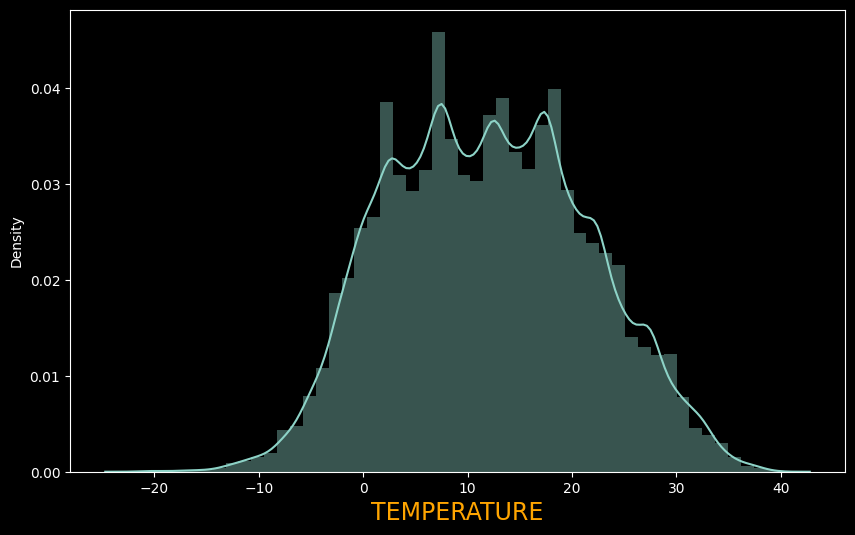

In [29]:
plt.style.use('dark_background')
plt.subplots(figsize=(10,6))
sns.distplot(dep_data['Temperature (C)'])
plt.xlabel('TEMPERATURE',fontdict={'color':'orange','fontsize':17})

In [30]:
#splitting the dataset into Test set and Train set
X_train,X_test,y_train,y_test=train_test_split(ind_data,dep_data,test_size=0.2,random_state=0)

We are spliting the data on percentage basis i.e 20% of the data will be used for testing and the remaining 80% of the data will be used for training.

In [31]:
print(X_test.shape)
print(X_train.shape)

(19291, 6)
(77162, 6)


Test Data contains 19291 rows while Train data contains 77162 rows.

## BUILDING THE MODEL

In [32]:
#adding the intercept term to the model
X_test=sm.add_constant(X_test)
X_train=sm.add_constant(X_train)

In [33]:
#Fitting the model
fitting=sm.OLS(y_train,X_train).fit()
#Predicting the test set results
y_pred=fitting.predict(X_test)
fitting.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Temperature (C)   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.271e+06
Date:                Mon, 16 Dec 2024   Prob (F-statistic):               0.00
Time:                        12:26:00   Log-Likelihood:            -1.0606e+05
No. Observations:               77162   AIC:                         2.121e+05
Df Residuals:                   77155   BIC:                         2.122e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        2.7286      0.041     67.061      0.000       2.649       2.808
Apparent Temperature (C)     0.8751      0.000   2052.169      0.000       0.874       0.876
Humidity                    -1.2998      0.026    -49.057      0.000      -1.352      -1.248
Wind Speed (km/h)            0.0812      0.001    151.927      0.000       0.080       0.082
Wind Bearing (degrees)      -0.0004   3.24e-05    -12.793      0.000      -0.000      -0.000
Visibility (km)              0.0096      0.001     10.534      0.000       0.008       0.011
Pressure (millibars)        -0.0002   2.99e-05     -7.703      0.000      -0.000      -0.000
==============================================================================
Omnibus:                     2138.932   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2630.243
Skew:                          -0.350   Prob(JB):                         0.00
Kurtosis:                       3.572   Cond. No.                     1.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
#extracting only the coefficients
fitting.params

const                       2.728576
Apparent Temperature (C)    0.875062
Humidity                   -1.299778
Wind Speed (km/h)           0.081195
Wind Bearing (degrees)     -0.000414
Visibility (km)             0.009611
Pressure (millibars)       -0.000230
dtype: float64

In [35]:
#checking the VIF value
df=pd.DataFrame()
df['VIF Factor']=[variance_inflation_factor(X_train.values,j)for j in range(X_train.shape[1])]
df['Features']=X_train.columns
display(df)

,VIF Factor,Features
0,139.585417,const
1,1.757863,Apparent Temperature (C)
2,1.813931,Humidity
3,1.151888,Wind Speed (km/h)
4,1.017392,Wind Bearing (degrees)
5,1.231409,Visibility (km)
6,1.007634,Pressure (millibars)


The maximum limit of VIF factor is 1.7.Since the independent variable 'Humidity' has Vif factor greater than the acceptable limit, we will drop it and re-train the model

In [36]:
#Preparing the train and test dataset by dropping Humidity for the second round of modelling
X_test1=X_test.drop(['Humidity'],axis=1)
X_train1=X_train.drop(['Humidity'],axis=1)

In [37]:
#Fitting and predicting the test results for the second round
fitting1=sm.OLS(y_train,X_train1).fit()
y_pred1=fitting1.predict(X_test1)
fitting1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Temperature (C)   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.479e+06
Date:                Mon, 16 Dec 2024   Prob (F-statistic):               0.00
Time:                        12:26:00   Log-Likelihood:            -1.0725e+05
No. Observations:               77162   AIC:                         2.145e+05
Df Residuals:                   77156   BIC:                         2.146e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.4926      0.032     46.006      0.000       1.429       1.556
Apparent Temperature (C)     0.8870      0.000   2496.577      0.000       0.886       0.888
Wind Speed (km/h)            0.0896      0.001    174.252      0.000       0.089       0.091
Wind Bearing (degrees)      -0.0005   3.28e-05    -15.915      0.000      -0.001      -0.000
Visibility (km)              0.0172      0.001     18.792      0.000       0.015       0.019
Pressure (millibars)        -0.0002   3.04e-05     -7.744      0.000      -0.000      -0.000
==============================================================================
Omnibus:                     1026.186   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1367.139
Skew:                          -0.188   Prob(JB):                    1.35e-297
Kurtosis:                       3.533   Cond. No.                     9.53e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

My model achieved a R-square of 99% which means 99% of variation of the dependent variable is being explained by the inependent variables.Higher is the R-square the better is my model.

R-square and Adjusted R-square are same.So we can say that our model fitted well as the criteria required for it is that the difference betwween theR-square and Adjusted R-square should be minimum.

The model also satifies the Durbin Watson Test(i.e DW should be equal to 2).Therefore we can say that there is no problem of auto-correlation in the model.

In [38]:
#Extracting the coefficients
fitting1.params

const                       1.492553
Apparent Temperature (C)    0.887018
Wind Speed (km/h)           0.089589
Wind Bearing (degrees)     -0.000522
Visibility (km)             0.017161
Pressure (millibars)       -0.000235
dtype: float64

In [39]:
#checking the VIF value for the second round of modelling
df1=pd.DataFrame()
df1['VIF Factor']=[variance_inflation_factor(X_train1.values,j)for j in range(X_train1.shape[1])]
df1['Features']=X_train1.columns
display(df1)

,VIF Factor,Features
0,86.059297,const
1,1.183520,Apparent Temperature (C)
2,1.033815,Wind Speed (km/h)
3,1.012702,Wind Bearing (degrees)
4,1.196369,Visibility (km)
5,1.007623,Pressure (millibars)


Since all our independent variables acheived VIF factor less than 1.7, which is the acceptable limit.So, we can say that our model has no problem of multicollinearity(i.e High correlation between explanatory variables).

In [40]:
#Root Mean Square Error
from sklearn import metrics
import math
RMSE=math.sqrt(metrics.mean_squared_error(y_test,y_pred1))
print(RMSE)

0.9710819002420938


The RMSE of our model is 0.9724785866960971 which indicates that we have a loss of 0.9724785866960971, which is quite small so, our model did well.

In [41]:
type(y_pred1)

pandas.core.series.Series

## Now, let's compare our predicitions against our targets to check if we got a correlated trend.

## ACTUAL VS PREDICTED

In [42]:
#converting y_pred1 into a Data Frame
y_pred1=pd.DataFrame(y_pred1)

Text(0.5, 1.0, 'Actual Temperature vs Predicted Temperature')

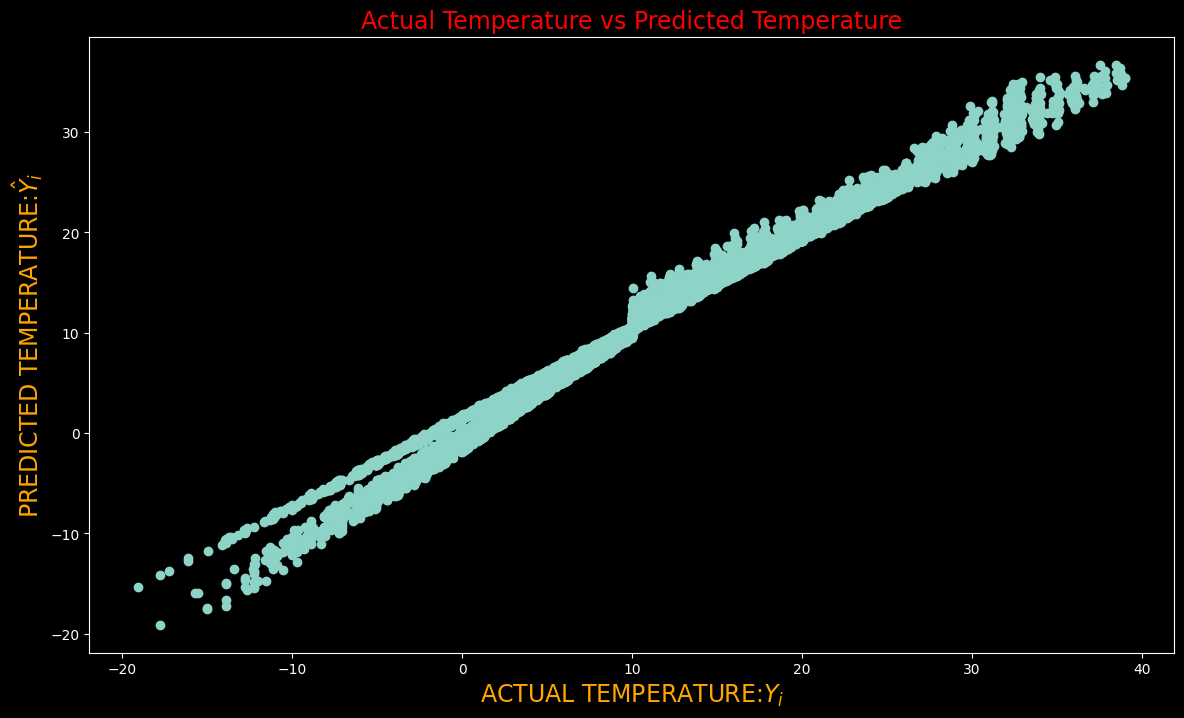

In [43]:
plt.subplots(figsize=(14,8))
plt.scatter(y_test,y_pred1)
plt.xlabel('ACTUAL TEMPERATURE:$Y_i$',fontdict={'color':'orange','fontsize':17})
plt.ylabel('PREDICTED TEMPERATURE:$\hat{Y}_i$',fontdict={'color':'orange','fontsize':17})
plt.title('Actual Temperature vs Predicted Temperature',fontdict={'color':'red','fontsize':17})

Our model did well as we got a positive correlated trend.